# Microplankton fraction

https://doi.pangaea.de/10.1594/PANGAEA.892211?format=html#download

The retrieval of percent microplankton allows for comparison with both current and historical (reported as either >20 mm or <20 mm due to filter size) phytoplankton size fraction- ated data sets. In this way, Sfm is the difference of one and Sf (Sfm = 1 − Sf) and varies from 0%, where phytoplankton is dominated by picoplankton to 100%, where it is dominated by microplankton.

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

## Import Sfm data (all June data from 1998-2015)

In [3]:
newNCDFfiles_06 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*06_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_06[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_06[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_06[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_06[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_06[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_06[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_06[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_06[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_06[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_06[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_06[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_06[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_06[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_06[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_06[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_06[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_06[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_06[17])

ds_06 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## January 

In [4]:
newNCDFfiles_01 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*01_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_01[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_01[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_01[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_01[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_01[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_01[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_01[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_01[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_01[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_01[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_01[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_01[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_01[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_01[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_01[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_01[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_01[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_01[17])

ds_01 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## February

In [5]:
newNCDFfiles_02 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*02_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_02[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_02[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_02[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_02[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_02[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_02[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_02[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_02[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_02[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_02[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_02[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_02[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_02[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_02[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_02[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_02[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_02[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_02[17])

ds_02 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## March 

In [6]:
newNCDFfiles_03 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*03_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_03[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_03[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_03[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_03[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_03[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_03[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_03[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_03[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_03[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_03[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_03[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_03[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_03[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_03[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_03[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_03[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_03[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_03[17])

ds_03 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## April

In [7]:
newNCDFfiles_04 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*04_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_04[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_04[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_04[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_04[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_04[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_04[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_04[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_04[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_04[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_04[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_04[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_04[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_04[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_04[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_04[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_04[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_04[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_04[17])

ds_04 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## May

In [8]:
newNCDFfiles_05 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*05_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_05[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_05[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_05[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_05[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_05[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_05[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_05[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_05[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_05[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_05[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_05[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_05[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_05[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_05[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_05[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_05[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_05[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_05[17])

ds_05 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## July

In [9]:
newNCDFfiles_07 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*07_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_07[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_07[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_07[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_07[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_07[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_07[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_07[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_07[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_07[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_07[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_07[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_07[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_07[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_07[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_07[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_07[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_07[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_07[17])

ds_07 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## August

In [10]:
newNCDFfiles_08 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*08_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_08[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_08[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_08[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_08[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_08[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_08[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_08[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_08[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_08[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_08[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_08[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_08[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_08[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_08[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_08[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_08[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_08[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_08[17])

ds_08 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## September

In [11]:
newNCDFfiles_09 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*09_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_09[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_09[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_09[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_09[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_09[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_09[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_09[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_09[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_09[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_09[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_09[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_09[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_09[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_09[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_09[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_09[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_09[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_09[17])

ds_09 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## October

In [12]:
newNCDFfiles_10 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*10_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_10[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_10[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_10[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_10[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_10[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_10[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_10[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_10[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_10[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_10[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_10[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_10[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_10[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_10[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_10[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_10[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_10[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_10[17])

ds_10 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## November

In [13]:
newNCDFfiles_11 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*11_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_11[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_11[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_11[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_11[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_11[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_11[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_11[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_11[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_11[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_11[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_11[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_11[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_11[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_11[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_11[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_11[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_11[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_11[17])

ds_11 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## December 

In [14]:
newNCDFfiles_12 = sorted(glob.glob('/glade/scratch/gabyn/Sfm_data/*12_MO_4km.nc', recursive=True),
                      key=numericalSort)
ds_1998 = xr.open_mfdataset(newNCDFfiles_12[0])
ds_1999 = xr.open_mfdataset(newNCDFfiles_12[1])
ds_2000 = xr.open_mfdataset(newNCDFfiles_12[2])
ds_2001 = xr.open_mfdataset(newNCDFfiles_12[3])
ds_2002 = xr.open_mfdataset(newNCDFfiles_12[4])
ds_2003 = xr.open_mfdataset(newNCDFfiles_12[5])
ds_2004 = xr.open_mfdataset(newNCDFfiles_12[6])
ds_2005 = xr.open_mfdataset(newNCDFfiles_12[7])
ds_2006 = xr.open_mfdataset(newNCDFfiles_12[8])
ds_2007 = xr.open_mfdataset(newNCDFfiles_12[9])
ds_2008 = xr.open_mfdataset(newNCDFfiles_12[10])
ds_2009 = xr.open_mfdataset(newNCDFfiles_12[11])
ds_2010 = xr.open_mfdataset(newNCDFfiles_12[12])
ds_2011 = xr.open_mfdataset(newNCDFfiles_12[13])
ds_2012 = xr.open_mfdataset(newNCDFfiles_12[14])
ds_2013 = xr.open_mfdataset(newNCDFfiles_12[15])
ds_2014 = xr.open_mfdataset(newNCDFfiles_12[16])
ds_2015 = xr.open_mfdataset(newNCDFfiles_12[17])

ds_12 = np.stack([ds_1998.Sfm,ds_1999.Sfm,ds_2000.Sfm,
              ds_2001.Sfm,ds_2002.Sfm,ds_2003.Sfm,
              ds_2004.Sfm,ds_2005.Sfm,ds_2006.Sfm,
              ds_2007.Sfm,ds_2008.Sfm,ds_2009.Sfm,
               ds_2010.Sfm,ds_2011.Sfm,ds_2012.Sfm,
              ds_2013.Sfm,ds_2014.Sfm,ds_2015.Sfm])

## Save these so it is easier to obtain them later on! 

In [26]:
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_01.npy", ds_01)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_02.npy", ds_02)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_03.npy", ds_03)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_04.npy", ds_04)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_05.npy", ds_05)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_06.npy", ds_06)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_07.npy", ds_07)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_08.npy", ds_08)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_09.npy", ds_09)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_10.npy", ds_10)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_11.npy", ds_11)
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_12.npy", ds_12)

## Plot average Sfm in June from 1998-2015 in the top 30 degrees of the Arctic Ocean. 

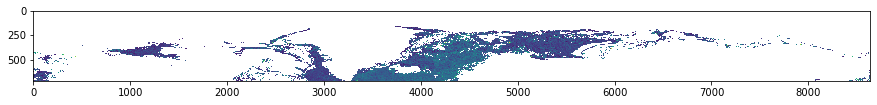

In [24]:
# Show the northern most 30 degrees! 
Sfm = np.array(np.nanmean(ds_06,axis=0)) # average over the years 
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.swapaxes(Sfm[:,0:720],1,0))

## Plot only in 1998, to see if there is a large difference (just in June of 1998)

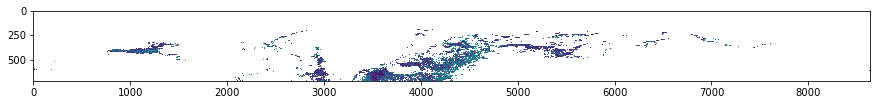

In [6]:
# Show the northern most 30 degrees! 
Sfm_1998 = np.array(ds_199806.Sfm)
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.swapaxes(Sfm_1998[:,0:720],1,0))

## Plot average Sfm throughout the year 

In [27]:
ds_annual = np.stack([np.nanmean(ds_01,axis=0), 
                      np.nanmean(ds_02,axis=0),
                      np.nanmean(ds_03,axis=0),
                      np.nanmean(ds_04,axis=0),
                      np.nanmean(ds_05,axis=0),
                      np.nanmean(ds_06,axis=0),
                      np.nanmean(ds_07,axis=0),
                      np.nanmean(ds_08,axis=0),
                      np.nanmean(ds_09,axis=0),
                      np.nanmean(ds_10,axis=0),
                      np.nanmean(ds_11,axis=0),
                      np.nanmean(ds_12,axis=0)])

## Saving this array so that it can be used later without this whole hassle
np.save("Sfm_annual.npy", ds_annual)
loaded_array = np. load("Sfm_annual.npy")
print(loaded_array)

In [28]:
np.save("/glade/scratch/gabyn/Sfm_data/Sfm_annual.npy", ds_annual)

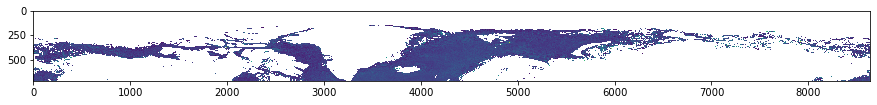

In [33]:
Sfm_annual = np.array(np.nanmean(ds_annual,axis=0)) # average over the months  
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.swapaxes(Sfm_annual[:,0:720],1,0))

## Plot all of the global points (Average of June from 1998-2015)

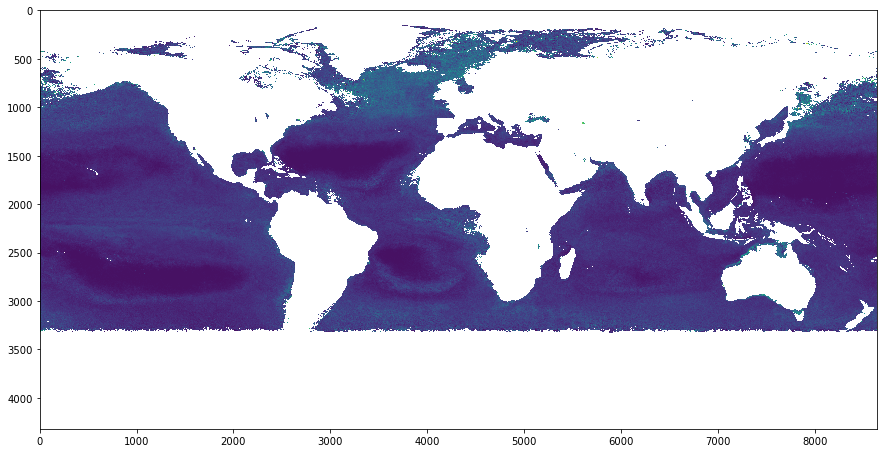

In [9]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.swapaxes(np.nanmean(ds_06,axis=0),1,0))

## Only June in 1998 to see the differnce 

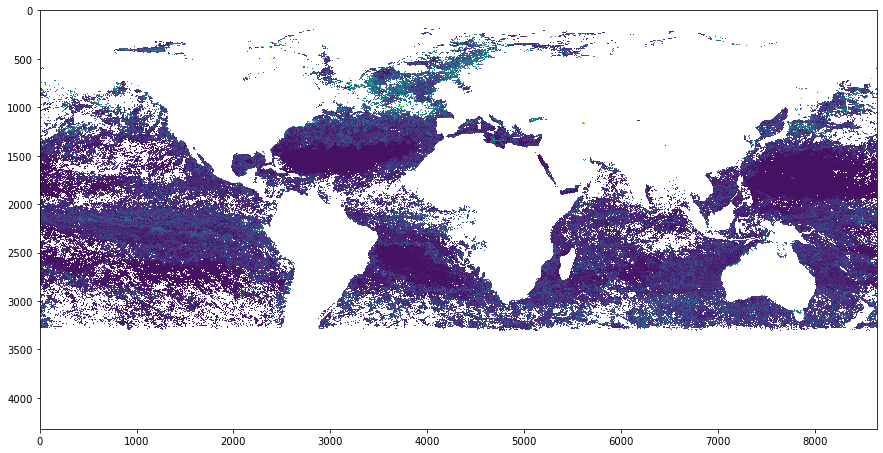

In [10]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.swapaxes(ds_1998.Sfm,1,0))

#### There are deffinitely more points when you average through the whole time series 1998-2015, so this is good, maybe this will give a better understanding on how it differs from SPECTRA, or have a better idea of the general contirbution of phytoplankton in the Arctic Ocean